In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import nltk
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
df = pd.read_csv('/content/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
df.head()

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park,15.0,30.0,USA,2023
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout,20.0,40.0,USA,2023
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure,8.0,15.0,UK,2023
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food,12.0,25.0,Australia,2023


In [ ]:
# renaming the column Retweets to Reposts
df.rename(columns={'Retweets': 'Reposts'}, inplace=True)
df.head()

,Text,Sentiment,Platform,Hashtags,Reposts,Likes,Country,Year
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park,15.0,30.0,USA,2023
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout,20.0,40.0,USA,2023
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure,8.0,15.0,UK,2023
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food,12.0,25.0,Australia,2023


In [ ]:
df.shape

(732, 8)

In [ ]:
df.describe()

,Reposts,Likes,Year
count,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311
std,7.061286,14.089848,2.802285
min,5.000000,10.000000,2010.000000
25%,17.750000,34.750000,2019.000000
50%,22.000000,43.000000,2021.000000
75%,25.000000,50.000000,2023.000000
max,40.000000,80.000000,2023.000000


In [ ]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

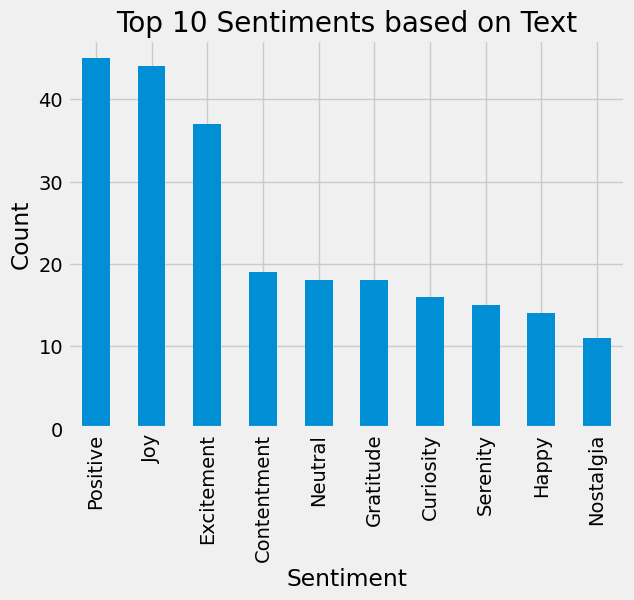

In [ ]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

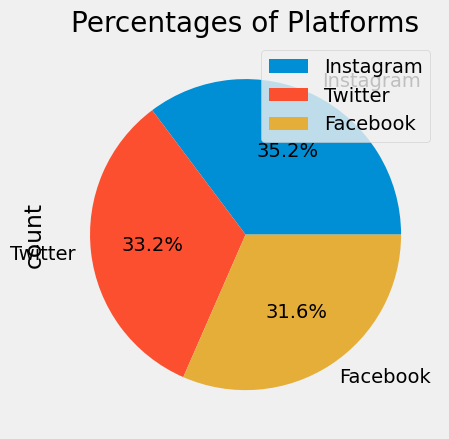

In [ ]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

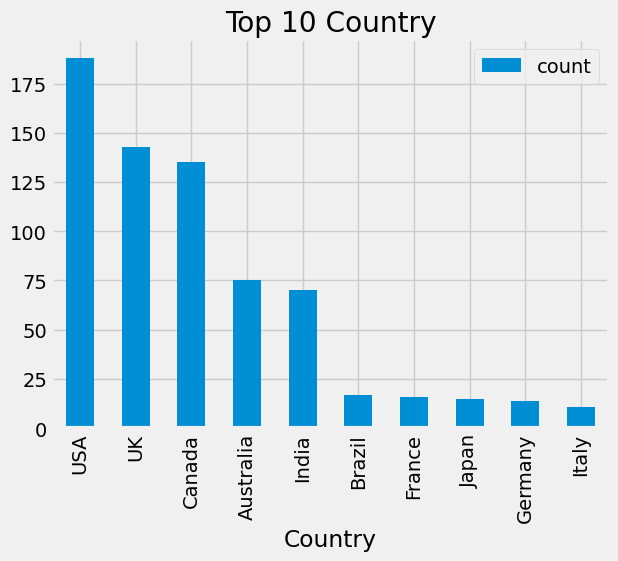

In [ ]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

In [ ]:
# Create a dictionary from the column Hashtags and the occurance of different hashtags
hashtags = {}
for i in df['Hashtags']:
    for j in i.split():
        if j in hashtags:
            hashtags[j] += 1
        else:
            hashtags[j] = 1

In [ ]:
#Printing the top ten hashtags
hashtags = pd.DataFrame(hashtags.items(), columns=['Hashtag', 'Count'])
hashtags = hashtags.sort_values(by='Count', ascending=False)
hashtags.head(10)

,Hashtag,Count
173,#Serenity,15
131,#Excitement,13
10,#Gratitude,13
220,#Despair,11
267,#Nostalgia,11
258,#Curiosity,10
172,#Contentment,10
314,#Hopeful,9
222,#Grief,9
114,#Awe,9


In [ ]:
# Printing the minimun and Maximum of numerical columns
numerical_columns = df[['Year', 'Likes', 'Reposts']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Reposts: 5.0 | Maximum Reposts: 40.0


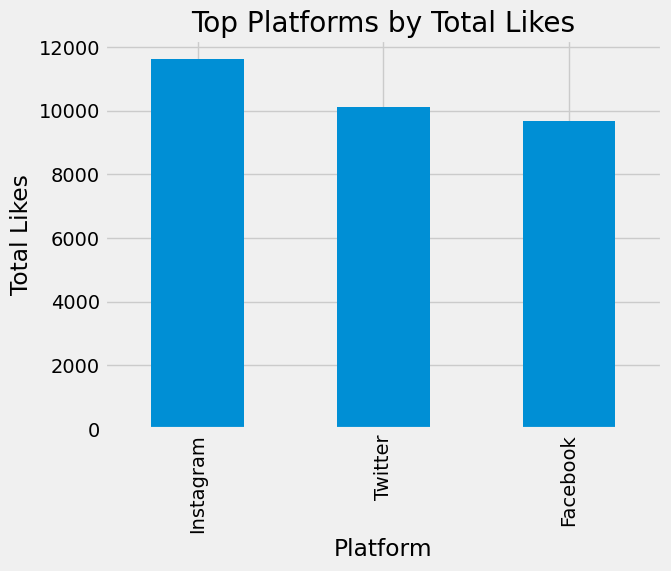

In [ ]:
# Likes per Platform
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

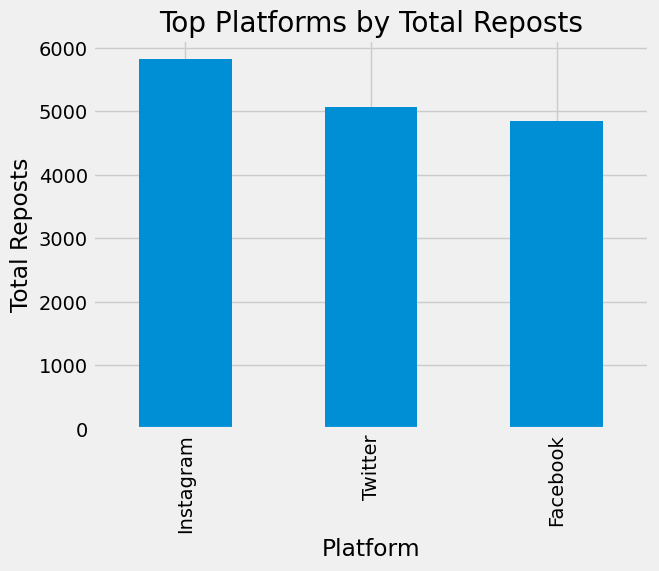

In [ ]:
# Reposts per Platform
top_retweets_platform = df.groupby('Platform')['Reposts'].sum().nlargest(10)
top_retweets_platform.plot(kind='bar')
plt.title('Top Platforms by Total Reposts')
plt.xlabel('Platform')
plt.ylabel('Total Reposts')
plt.show()

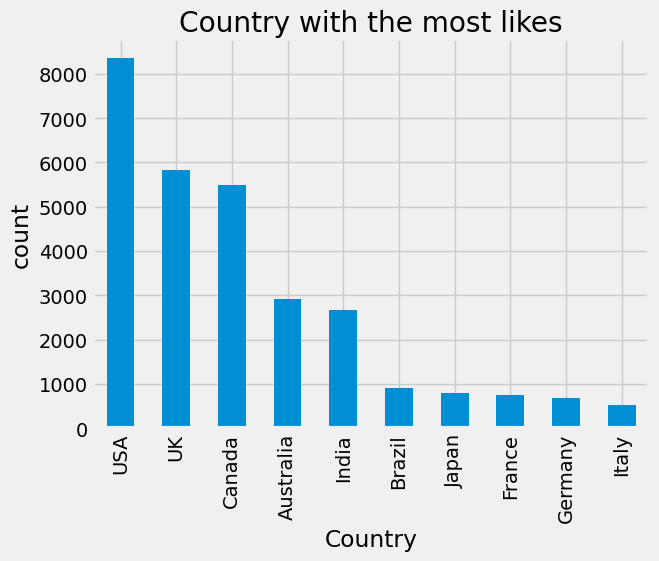

In [ ]:
# Country with the most likes
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Country with the most likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

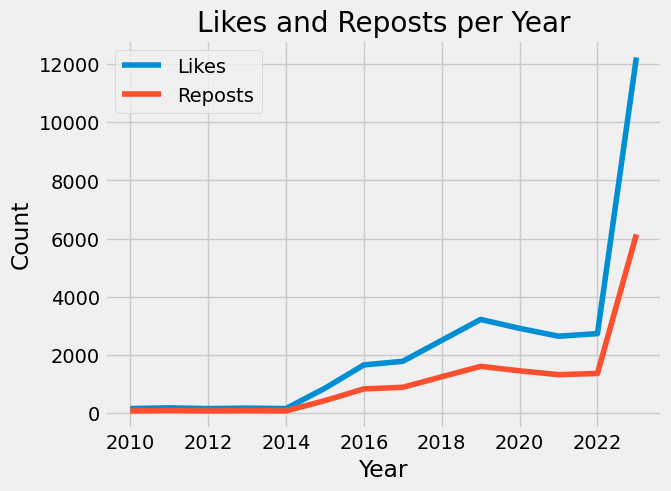

In [ ]:
#ploting lineplot for likesand reposts per year
df.groupby('Year').sum()[['Likes', 'Reposts']].plot(kind='line')
plt.title('Likes and Reposts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Sent Analysis

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

texts = list(df['Text'])
results = nlp(texts)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']}\n")

Text: Enjoying a beautiful day at the park!
Sentiment: POSITIVE, Score: 0.9998897314071655

Text: Traffic was terrible this morning.
Sentiment: NEGATIVE, Score: 0.9988304972648621

Text: Just finished an amazing workout! 💪
Sentiment: POSITIVE, Score: 0.9991503953933716

Text: Excited about the upcoming weekend getaway!
Sentiment: POSITIVE, Score: 0.9996711015701294

Text: Trying out a new recipe for dinner tonight.
Sentiment: NEGATIVE, Score: 0.8354247212409973

Text: Feeling grateful for the little things in life.
Sentiment: POSITIVE, Score: 0.9997934699058533

Text: Rainy days call for cozy blankets and hot cocoa.
Sentiment: NEGATIVE, Score: 0.7110608816146851

Text: The new movie release is a must-watch!
Sentiment: POSITIVE, Score: 0.9998325109481812

Text: Political discussions heating up on the timeline.
Sentiment: POSITIVE, Score: 0.980705201625824

Text: Missing summer vibes and beach days.
Sentiment: NEGATIVE, Score: 0.9995208978652954

Text: Just published a new blog post. Che

In [ ]:
df['Sentiment'] = [result['label'] for result in results]
df.head(10)

,Text,Sentiment,Platform,Hashtags,Reposts,Likes,Country,Year
0,Enjoying a beautiful day at the park!,POSITIVE,Twitter,#Nature #Park,15.0,30.0,USA,2023
1,Traffic was terrible this morning.,NEGATIVE,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023
2,Just finished an amazing workout! 💪,POSITIVE,Instagram,#Fitness #Workout,20.0,40.0,USA,2023
3,Excited about the upcoming weekend getaway!,POSITIVE,Facebook,#Travel #Adventure,8.0,15.0,UK,2023
4,Trying out a new recipe for dinner tonight.,NEGATIVE,Instagram,#Cooking #Food,12.0,25.0,Australia,2023
5,Feeling grateful for the little things in life.,POSITIVE,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023
6,Rainy days call for cozy blankets and hot cocoa.,NEGATIVE,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023
7,The new movie release is a must-watch!,POSITIVE,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023
8,Political discussions heating up on the timeline.,POSITIVE,Twitter,#Politics #Debate,30.0,60.0,USA,2023
9,Missing summer vibes and beach days.,NEGATIVE,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023


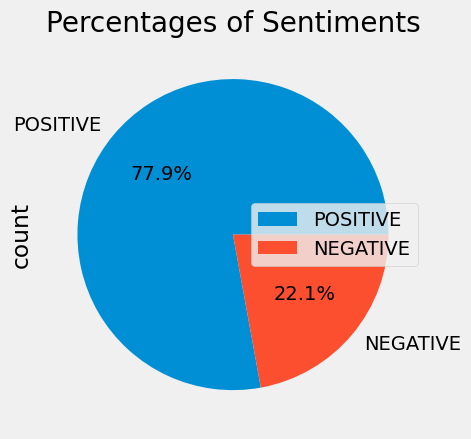

In [ ]:
#ploting a pie plot with positive vs negative sentiments
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Sentiments')
plt.legend()
plt.show()

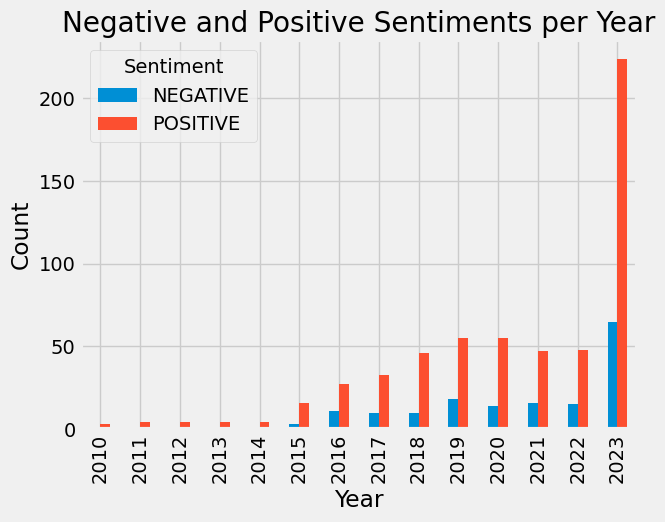

In [ ]:
# ploting a histogram with the negative and positive sentiments for each year
df.groupby('Year')['Sentiment'].value_counts().unstack().plot(kind='bar')
plt.title('Negative and Positive Sentiments per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

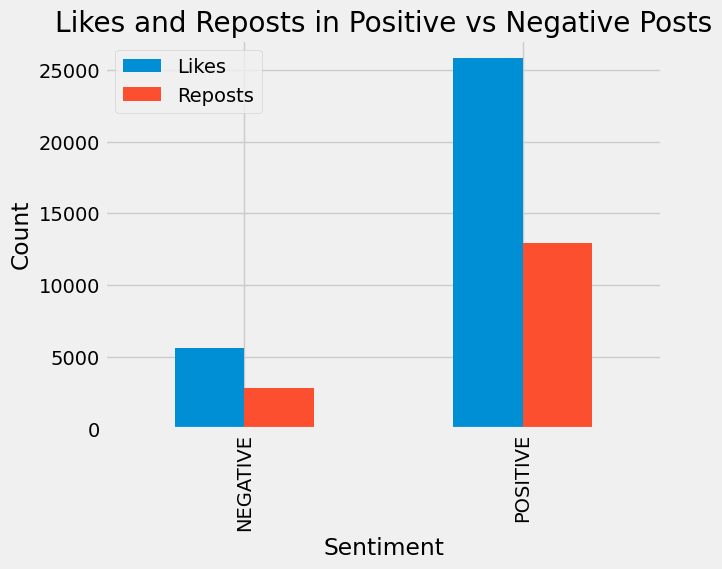

In [ ]:
#ploting bar plot on likes and reposts in positive vs negative posts
df.groupby('Sentiment')[['Likes', 'Reposts']].sum().plot(kind='bar') # Changed ('Likes', 'Reposts') to ['Likes', 'Reposts']
plt.title('Likes and Reposts in Positive vs Negative Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()